In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
from pathlib import Path

In [2]:
base_url = 'out/exp_aug_200/results/'

In [3]:
def filter_random(file):
    name = file.name
    if 'Random' in name and 'entropy' not in name:
        return True
    else:
        return False

In [4]:
def filter_coreset(file):
    name = file.name
    if 'CoreSet' in name and 'entropy' not in name:
        return True
    else:
        return False

In [5]:
def filter_bayesian(file):
    name = file.name
    if 'Bayesian' in name and 'entropy' not in name:
        return True
    else:
        return False

In [6]:
def filter_uncertainty(file):
    name = file.name
    if 'Uncertainty' in name and 'entropy' not in name:
        return True
    else:
        return False

In [7]:
all_files = list(Path(base_url).glob('*.pkl'))
random_files = list(filter(filter_random, all_files))
bayesian_files = list(filter(filter_bayesian, all_files))
coreset_files = list(filter(filter_coreset, all_files))
uncertainty_files = list(filter(filter_uncertainty, all_files))
random_files, bayesian_files, coreset_files, uncertainty_files

([PosixPath('out/exp_aug_200/results/Random_breakhis_1000_1000_1.pkl'),
  PosixPath('out/exp_aug_200/results/Random_breakhis_1000_1000_2.pkl'),
  PosixPath('out/exp_aug_200/results/Random_breakhis_1000_1000_0.pkl'),
  PosixPath('out/exp_aug_200/results/Random_breakhis_1000_1000_4.pkl'),
  PosixPath('out/exp_aug_200/results/Random_breakhis_1000_1000_3.pkl')],
 [PosixPath('out/exp_aug_200/results/Bayesian_breakhis_1000_1000_1.pkl'),
  PosixPath('out/exp_aug_200/results/Bayesian_breakhis_1000_1000_4.pkl'),
  PosixPath('out/exp_aug_200/results/Bayesian_breakhis_1000_1000_3.pkl'),
  PosixPath('out/exp_aug_200/results/Bayesian_breakhis_1000_1000_0.pkl'),
  PosixPath('out/exp_aug_200/results/Bayesian_breakhis_1000_1000_2.pkl')],
 [PosixPath('out/exp_aug_200/results/CoreSet_breakhis_1000_1000_3.pkl'),
  PosixPath('out/exp_aug_200/results/CoreSet_breakhis_1000_1000_2.pkl'),
  PosixPath('out/exp_aug_200/results/CoreSet_breakhis_1000_1000_4.pkl'),
  PosixPath('out/exp_aug_200/results/CoreSet_brea

In [8]:
random_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in random_files])
bayesian_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in bayesian_files])
coreset_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in coreset_files])
uncertainty_results = np.asarray([pkl.load(open(file, 'rb'))[0] for file in uncertainty_files])

In [9]:
random_mean = random_results.mean(axis=0)
bayesian_mean = bayesian_results.mean(axis=0)
coreset_mean = coreset_results.mean(axis=0)
unceratinty_mean = uncertainty_results.mean(axis=0)
random_mean, bayesian_mean, coreset_mean, unceratinty_mean

(array([0.8330521 , 0.86630273, 0.89062035, 0.92148885, 0.92138958,
        0.91652604, 0.93240694]),
 array([0.83632753, 0.8798015 , 0.91751862, 0.92476425, 0.9314144 ,
        0.93607941, 0.92982631]),
 array([0.85697269, 0.8648139 , 0.9014392 , 0.91791563, 0.93091811,
        0.92754341, 0.93062034]),
 array([0.84248139, 0.86302729, 0.90888337, 0.92595533, 0.92863523,
        0.92486353, 0.93121589]))

In [10]:
range(random_mean.shape[0])

range(0, 7)

In [11]:
labels_list = (np.asarray([1000, 2000, 3000, 4000, 5000, 6000, 7000])/7000)*100

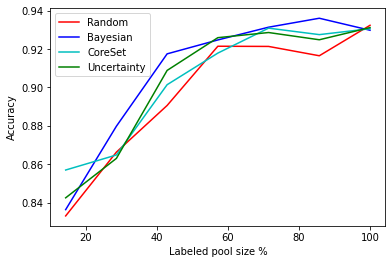

In [12]:
plt.figure()
plt.plot(labels_list, random_mean, 'r', label= 'Random')
plt.plot(labels_list, bayesian_mean, 'b', label='Bayesian')
plt.plot(labels_list, coreset_mean, 'c', label='CoreSet')
plt.plot(labels_list, unceratinty_mean, 'g', label='Uncertainty')
plt.ylabel('Accuracy')
plt.xlabel('Labeled pool size %')
plt.legend()